# Power Grid Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
G = nx.read_edgelist('networks/networks_barabasi/powergrid.edgelist.txt',create_using=nx.Graph(), nodetype = int)

## Visualização

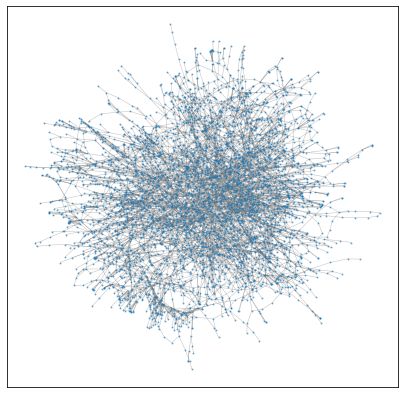

In [2]:
plt.figure(figsize=(7,7))
nx.draw_networkx(G, node_size=1, edge_color='grey', alpha=0.5, width=0.5, with_labels=False)
plt.show()

## Caracterização

In [64]:
n = G.number_of_nodes()
m = G.number_of_edges()
print('Número de vértices:', n)
print('Número de arestas:', m)
print('Grafo conexo?',nx.is_connected(G))

Número de vértices: 4941
Número de arestas: 6594
Grafo conexo? True


### 1) Grau

In [5]:
degrees = np.array([val for (node, val) in G.degree()])

In [10]:
from statistics import median
print('Máximo:', degrees.max())
print('Mínimo:', degrees.min())
print('Média:',degrees.mean())
print('Mediana:', median(degrees))
print('Desvio padrão:', degrees.std())


Máximo: 19
Mínimo: 1
Média: 2.66909532483303
Mediana: 2
Desvio padrão: 1.7912722617587216


#### Distribuição empírica

PMF:

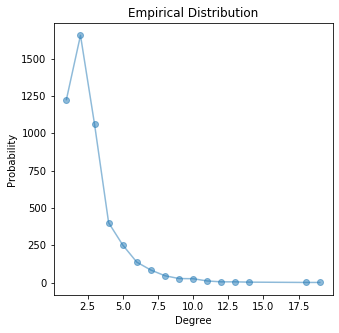

In [20]:
x, f = np.unique(degrees, return_counts=True)
plt.figure(figsize=(5,5))
plt.title('Empirical Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.scatter(x,f, alpha=0.5)
plt.plot(x,f, alpha=0.5)
plt.show()

CCDF:

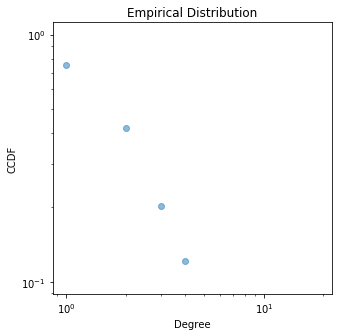

In [22]:
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.title('Empirical Distribution')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.scatter(x,ccdf, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
np.savetxt('vectors/powergrid-degree-ccdf.txt', [ccdf], delimiter=',', fmt='%f')
np.savetxt('vectors/powergrid-degree-x.txt', [x], delimiter=',', fmt='%d')

### 2) Distância 

Calculando a distância entre cada par de vértices:

In [23]:
dist = np.array([])
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v) # distância short path lenght
    spl2 = dict((v2,d) for v2,d in spl.items() if v2 != v) # distância exluindo d(v,v)
    dist = np.append(dist, list(spl2.values()))

In [24]:
np.savetxt('vectors/powergrid-dist.txt', [x], delimiter=',', fmt='%d')

Estatísticas básicas:

In [25]:
print('Máximo:', dist.max())
print('Mínimo:', dist.min())
print('Média:',dist.mean())
print('Mediana:', median(dist))
print('Desvio padrão:', dist.std())

Máximo: 46.0
Mínimo: 1.0
Média: 18.989185424445708
Mediana: 19.0
Desvio padrão: 6.507554119713548


Verificando o cálculo da distância média através do método disponibilizado pela biblioteca:

In [71]:
d_mean = nx.average_shortest_path_length(G)
print('Distância média:',d_mean)

Distância média: 18.989185424445708


PMF:

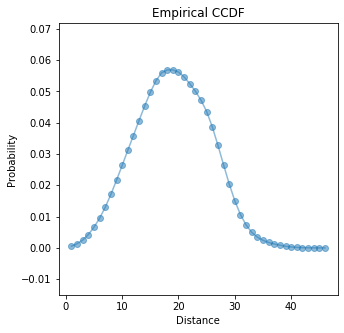

In [26]:
x, f_d = np.unique(dist, return_counts=True)
pmf = f_d/f_d.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical CCDF')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x,pmf,alpha=0.5)
plt.plot(x,pmf, alpha=0.5)
plt.show()

CCDF:

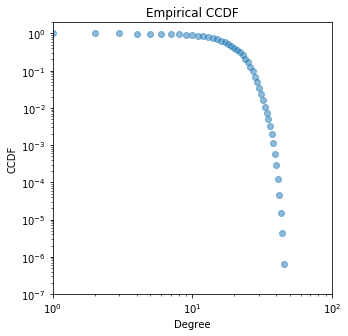

In [36]:
cdf = f_d.cumsum()/f_d.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x,ccdf,alpha=0.5)
plt.title('Empirical CCDF')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')

plt.ylim(10**-7, 2*10**0)
plt.xlim(10**0, 10**2)
plt.show()

In [37]:
np.savetxt('vectors/powergrid-dist-x.txt', [x], delimiter=',', fmt='%d')
np.savetxt('vectors/powergrid-dist-pmf.txt', [pmf], delimiter=',', fmt='%f')
np.savetxt('vectors/powergrid-dist-ccdf.txt', [ccdf], delimiter=',', fmt='%f')

### 3) Tamanho das componentes conexas

Número de componentes conexas:

In [73]:
nx.number_connected_components(G)

1

Tamanho das componentes:

In [74]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[4941]

### 4) Clusterização

#### 4.1) Clusterização Local

In [75]:
cluster = np.array(list(nx.clustering(G).values()))
print('Máximo:', cluster.max())
print('Mínimo:', cluster.min())
print('Média:', cluster.mean())
print('Mediana:', median(cluster))
print('Desvio padrão:', cluster.std())

Máximo: 1.0
Mínimo: 0.0
Média: 0.08010361108159712
Mediana: 0.0
Desvio padrão: 0.22418727760531196


Verificando a clusterização média:

In [76]:
nx.average_clustering(G)

0.08010361108159712

PMF:

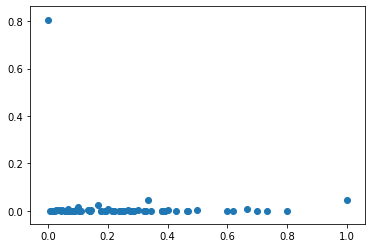

In [77]:
x, f = np.unique(cluster, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf)
plt.show()

CCDF:

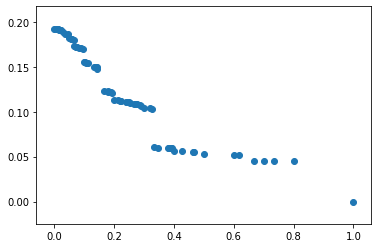

In [78]:
x, f = np.unique(cluster, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf

plt.scatter(x,ccdf)
plt.show()

#### 4.2) Clusterização global

In [79]:
n_triang = np.array(list(nx.triangles(G).values())).sum()/3 # método conta 3 vezes o triângula (1x para cada vértice)
print('Número de triângulos:', n_triang)

Número de triângulos: 651.0


Clusterização global:

In [80]:
nx.transitivity(G)

0.10315322452860086

### 5) Centralidade

#### 5.1) Centralidade de Grau

In [81]:
cent = np.array(list(nx.degree_centrality(G).values()))
print('Máximo:', cent.max())
print('Mínimo:', cent.min())
print('Média:', cent.mean())
print('Mediana:', median(cent))
print('Desvio padrão:', cent.std())

Máximo: 0.003846153846153846
Mínimo: 0.00020242914979757084
Média: 0.0005403026973346214
Mediana: 0.0004048582995951417
Desvio padrão: 0.00036260572100378977


CCDF:

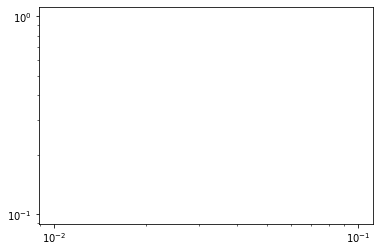

In [82]:
x, f = np.unique(cent, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.xscale('log')
plt.yscale('log')
plt.show()

#### 5.2) Betweeness

In [83]:
btw = np.array(list(nx.betweenness_centrality(G).values()))
print('Máximo:', btw.max())
print('Mínimo:', btw.min())
print('Média:', btw.mean())
print('Mediana:', median(btw))
print('Desvio padrão:', btw.std())

Máximo: 0.28841562147939637
Mínimo: 0.0
Média: 0.0036422728132103127
Mediana: 0.0004048582995951417
Desvio padrão: 0.016669177769166967


PMF:

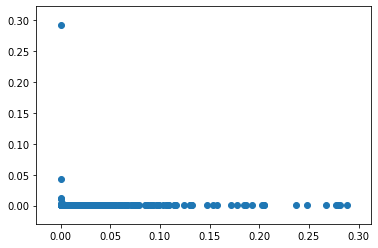

In [84]:
x, f = np.unique(btw, return_counts=True)
pmf = f/f.sum()
plt.scatter(x,pmf)
plt.show()

CCDF:

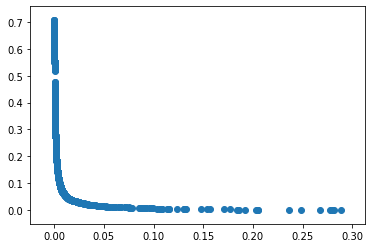

In [85]:
x, f = np.unique(btw, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

Visualziação do Betweenes:

In [86]:
#nx.draw_circular(G, node_color=btw, cmap=plt.cm.Blues, with_labels=True)

#### 5.3) Closeness

In [87]:
close = np.array(list(nx.closeness_centrality(G).values()))
print('Máximo:', close.max())
print('Mínimo:', close.min())
print('Média:', close.mean())
print('Mediana:', median(close))
print('Desvio padrão:', close.std())

Máximo: 0.08182330142114155
Mínimo: 0.033368458025992274
Média: 0.0536788753370791
Mediana: 0.05346031058925383
Desvio padrão: 0.007378657435766654


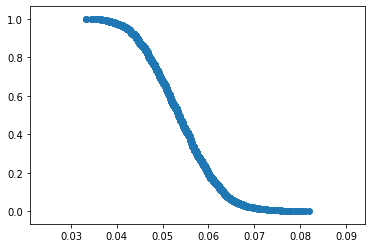

In [88]:
x, f = np.unique(close, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

In [89]:
#nx.draw_circular(G, node_color=close, cmap=plt.cm.Blues, with_labels=True)

#### 5.4) Auto-Vetor

In [90]:
ev = np.array(list(nx.eigenvector_centrality(G).values()))
print('Máximo:', ev.max())
print('Mínimo:', ev.min())
print('Média:', ev.mean())
print('Mediana:', median(ev))
print('Desvio padrão:', ev.std())

Máximo: 0.2865344997425942
Mínimo: 2.5844534949806683e-13
Média: 0.0013748720743855974
Mediana: 6.487236204115351e-09
Desvio padrão: 0.014159728362837043


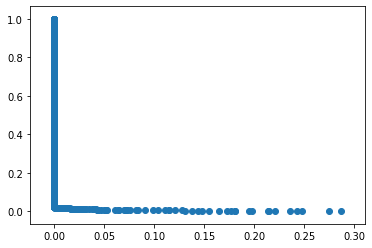

In [91]:
x, f = np.unique(ev, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

In [92]:
#nx.draw_circular(G, node_color=ev, cmap=plt.cm.Blues, with_labels=True)

#### 5.6) PageRank

In [93]:
pr = np.array(list(nx.pagerank(G, alpha=0.9).values()))
print('Máximo:', pr.max())
print('Mínimo:', pr.min())
print('Média:', pr.mean())
print('Mediana:', median(pr))
print('Desvio padrão:', pr.std())

Máximo: 0.0012619217986757857
Mínimo: 5.5144538210820745e-05
Média: 0.000202388180530257
Mediana: 0.00017454400746322047
Desvio padrão: 0.00011315279016893226


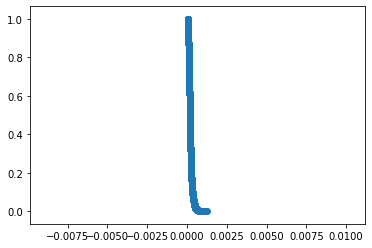

In [94]:
x, f = np.unique(pr, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [95]:
#nx.draw_circular(G, node_color=pr, cmap=plt.cm.Blues, with_labels=True)

### 5) Similaridade

#### 5.1) Jaccard

In [96]:
jaccard = np.array([p for (u, v, p) in nx.jaccard_coefficient(G)])
print('Máximo:', jaccard.max())
print('Mínimo:', jaccard.min())
print('Média:', jaccard.mean())
print('Mediana:', median(jaccard))
print('Desvio padrão:', jaccard.std())

Máximo: 1.0
Mínimo: 0.0
Média: 0.0003192309409136126
Mediana: 0.0
Desvio padrão: 0.010867012863508618


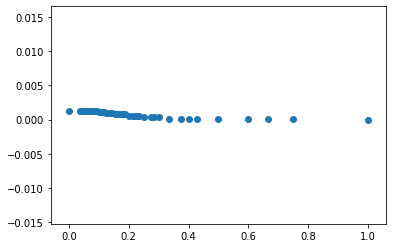

In [97]:
x, f = np.unique(jaccard, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

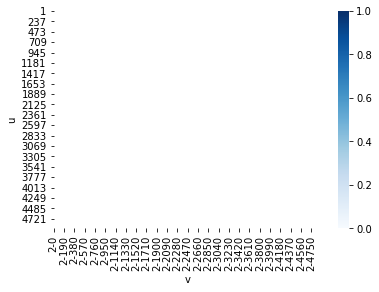

In [98]:
mapa = [[u,v, p] for (u, v, p) in nx.jaccard_coefficient(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
#plt.xticks(locs,range(1,33,2))
plt.xlabel('v')
plt.ylabel('u')
plt.show()

#### 5.2) Adamic/Adar

In [99]:
adamic = np.array([p for (u, v, p) in nx.adamic_adar_index(G)])
print('Máximo:', adamic.max())
print('Mínimo:', adamic.min())
print('Média:', adamic.mean())
print('Mediana:', median(adamic))
print('Desvio padrão:', adamic.std())

Máximo: 3.7956293084047643
Mínimo: 0.0
Média: 0.0009516694695484576
Mediana: 0.0
Desvio padrão: 0.029036748421469256


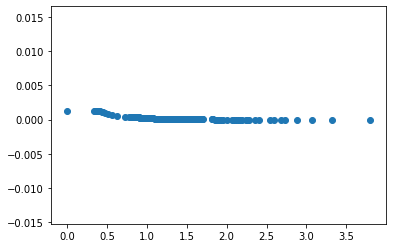

In [100]:
x, f = np.unique(adamic, return_counts=True)
cdf = f.cumsum()/f.sum()
ccdf = 1-cdf
plt.scatter(x,ccdf)
plt.show()

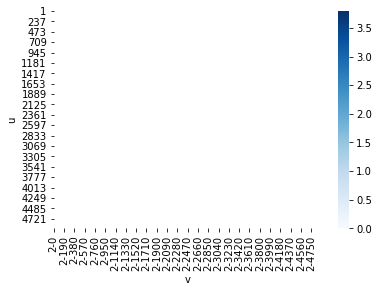

In [101]:
#pairs = dict([((u,v), p) for (u, v, p) in nx.adamic_adar_index(G)])
mapa = [[u,v, p] for (u, v, p) in nx.adamic_adar_index(G)]

import pandas as pd
df = pd.DataFrame(mapa)
df.set_index([0,1],inplace=True)
df_m = df.unstack(level=0)

import seaborn as sns
ax = sns.heatmap(df_m, cmap=plt.cm.Blues)
locs, labels = plt.xticks()
#plt.xticks(locs,range(1,34,2))
plt.xlabel('v')
plt.ylabel('u')
plt.show()